# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('previsao_de_renda.csv')

In [55]:
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

# Exercícios

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [27]:
df_qualitativo = df[['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']]
df_qualitativo

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa
...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,Assalariado,Secundário,Casado,Casa
14996,2016-03-01,M,True,True,Servidor público,Superior completo,Casado,Estúdio
14997,2016-03-01,F,True,True,Assalariado,Secundário,Casado,Casa
14998,2016-03-01,F,False,True,Servidor público,Superior completo,Casado,Casa


In [35]:
#Criar um DataFrame vazio para poder fazer as contagens de cada coluna
df_resultado = pd.DataFrame()

#Fazendo a contagem e adicionando no novo dataframe criado
#Sendo que é lido cada linha e agrupada com as datas
for linha in ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']:
    contagens = df_qualitativo.groupby(['data_ref', linha]).size().unstack(fill_value=0)
    df_resultado = df_resultado.add(contagens, fill_value=0)

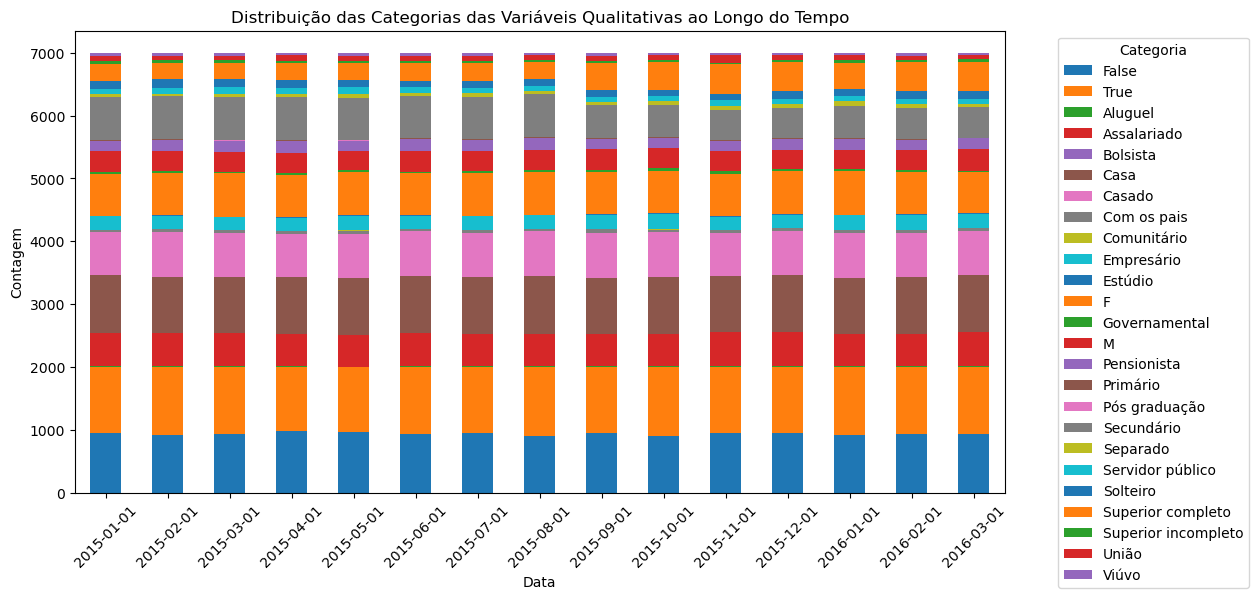

In [37]:
df_resultado.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Distribuição das Categorias das Variáveis Qualitativas ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Contagem")
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

**R:** Aparentemente não houve grandes diferenças nas variáveis ao longo do tempo, com excessão da educação que, o nível secundário e superior completo que variaram levemente mas que não devem influenciar tanto assim.

2) Para cada variável quantitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [58]:
df_quantitativo = df[['data_ref','qtd_filhos','idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
df_quantitativo

,data_ref,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,1,36,3.575342,3.0,3369.24
1,2015-01-01,0,42,0.860274,2.0,6096.14
2,2015-01-01,2,31,8.065753,4.0,5658.98
3,2015-01-01,0,50,1.208219,2.0,7246.69
4,2015-01-01,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...
14995,2016-03-01,1,37,2.046575,3.0,1193.29
14996,2016-03-01,1,30,12.079452,3.0,2519.18
14997,2016-03-01,0,40,2.161644,2.0,1586.85
14998,2016-03-01,0,47,3.295890,2.0,6975.39


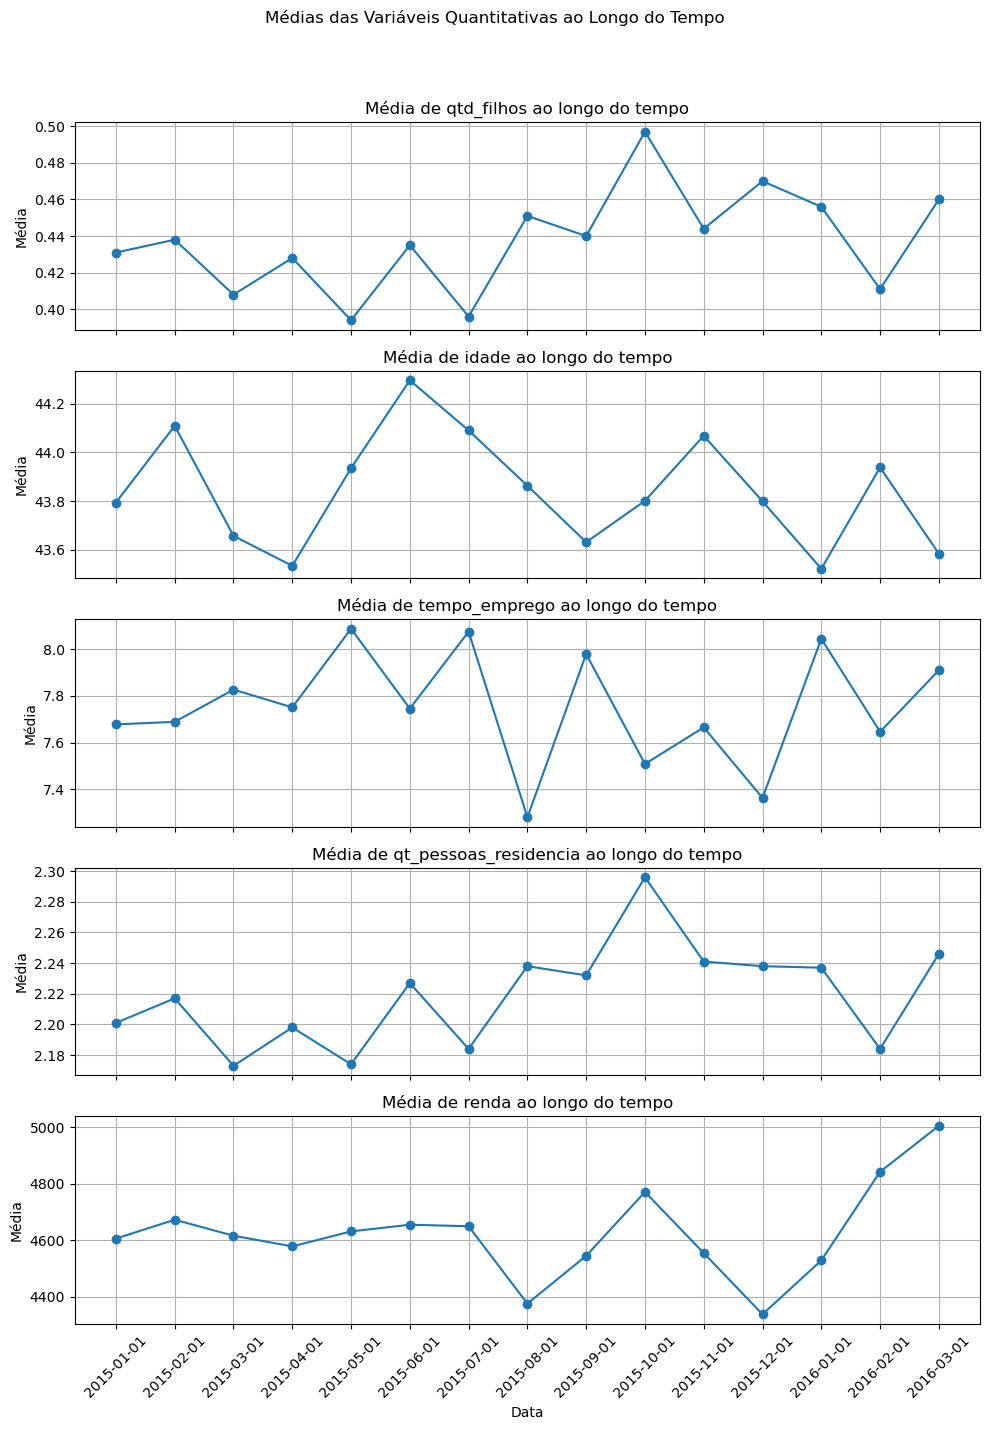

In [64]:
# Calcular as médias por data
medias_por_data = df_quantitativo.groupby('data_ref').mean()

#Criar o gráfico
fig, axs = plt.subplots(len(medias_por_data.columns), 1, figsize=(10, 15), sharex=True)
fig.suptitle("Médias das Variáveis Quantitativas ao Longo do Tempo")

# Plotar gráficos de linha para cada variável
for i, coluna in enumerate(medias_por_data.columns):
    axs[i].plot(medias_por_data.index, medias_por_data[coluna], marker='o')
    axs[i].set_title(f"Média de {coluna} ao longo do tempo")
    axs[i].set_ylabel("Média")
    axs[i].grid(True)

plt.xlabel("Data")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuste de layout
plt.show()

**R:** As variáveis quantitativas variaram bastante ao longo do tempo, com os valores de suas médias subindo e descendo quase que constantemente. Apesar de serem dados que demonstram ser inconstatntes são dados excênciais para uma analise de concessão de crédito, portanto devem ser sim usados em uma modelagem.